In [14]:
import tensorflow as tf
%matplotlib inline 
from tensorflow import keras
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten ,BatchNormalization
from tensorflow.keras.optimizers import Adam,Nadam, SGD
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import cv2
import os
from os import listdir

In [36]:
cats=[]
i=0
for images in os.listdir('cats'):
    img=cv2.imread(("cats//" +images),cv2.IMREAD_UNCHANGED)
    if(type(img) == type(None)):
      pass
    else:
      resized = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
      normalize=(np.asarray(resized).astype('float32')) / 255
      cats.append(normalize)

In [37]:
dogs=[]
i=0
for images in os.listdir('dogs'):
    img=cv2.imread(("dogs//" +images),cv2.IMREAD_UNCHANGED)
    if(type(img) == type(None)):
      pass
    else:
      resized = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
      normalize=(np.asarray(resized).astype('float32')) / 255
      dogs.append(normalize)

In [38]:
data = cats+dogs
data = np.array(data)

In [39]:
data.shape

(1995, 224, 224, 3)

In [40]:
cats_labels = np.ones(len(cats))
dogs_labels = np.zeros(len(dogs))

In [41]:
labels = np.concatenate((cats_labels, dogs_labels))
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [42]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,shuffle=True,test_size=0.1)

In [43]:
x_test.shape

(200, 224, 224, 3)

In [44]:
y_test.shape

(200,)

In [45]:
model = Sequential()

model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation="relu", input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3), strides= (2, 2)))

model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

In [46]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [54]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(lr=0.01),metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_20 (Bat  (None, 54, 54, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 26, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_21 (Bat  (None, 26, 26, 256)      1024      
 chNormalization)                                                
                                                      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [55]:
hist = model.fit(x_train,y_train, validation_data= (x_test,y_test),epochs=100,batch_size=32,shuffle=True)

Epoch 1/100
57/57 [==============================] - 4s 54ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 1.9363 - val_accuracy: 0.6400
Epoch 2/100
57/57 [==============================] - 3s 48ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 2.1013 - val_accuracy: 0.6300
Epoch 3/100
57/57 [==============================] - 3s 45ms/step - loss: 0.0204 - accuracy: 0.9928 - val_loss: 2.1252 - val_accuracy: 0.6450
Epoch 4/100
57/57 [==============================] - 3s 45ms/step - loss: 0.0137 - accuracy: 0.9933 - val_loss: 2.3333 - val_accuracy: 0.6300
Epoch 5/100
57/57 [==============================] - 3s 45ms/step - loss: 0.0090 - accuracy: 0.9978 - val_loss: 2.5677 - val_accuracy: 0.6250
Epoch 6/100
57/57 [==============================] - 3s 46ms/step - loss: 0.0113 - accuracy: 0.9972 - val_loss: 2.6170 - val_accuracy: 0.6250
Epoch 7/100
57/57 [==============================] - 3s 45ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 2.5598 - val_accuracy: 0.6500
Epoch 

In [57]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy*100," %")


7/7 [==============================] - 0s 24ms/step - loss: 3.0390 - accuracy: 0.6550
Test Loss: 3.038973093032837
Test Accuracy: 65.49999713897705  %


In [59]:
predictions = model.predict(x_test)

7/7 [==============================] - 0s 21ms/step


In [60]:
predictions_label = []
for i in range(len(predictions)):
    predictions_label.append(predictions[i].argmax())

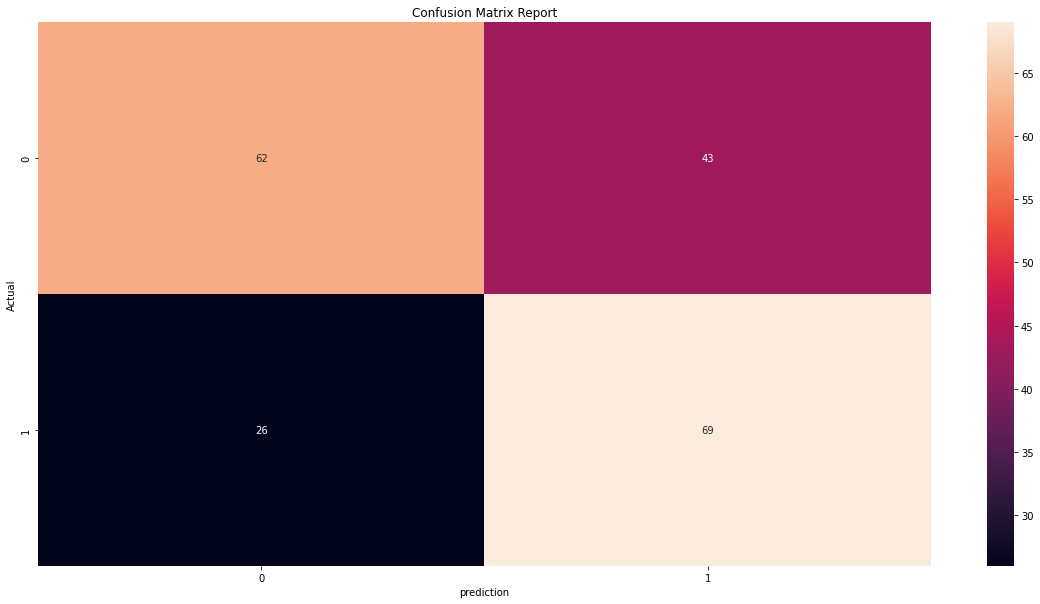

              precision    recall  f1-score   support

         0.0       0.70      0.59      0.64       105
         1.0       0.62      0.73      0.67        95

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.65       200



In [61]:
plt.figure(figsize=(20,10))
cf1 = confusion_matrix(y_test,predictions_label)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix Report')
plt.show()

print(classification_report(y_test,predictions_label))